In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Pressure in a Star
An example from Phys3150, Assignment 5 (Dr. Morrow, Fall 2015)

## Question 3
The dependence of the pressure on distancefrom the stellar center is expressed by the equation of hydrostatic equilibrium, $\frac{dP}{dr} = - \frac{G \rho(r) M_r }{r^2}$. The way in which the mass within a certain distance of the stellar center increases with that distance is expressed by the conservation fo mass equation, $\frac{dM_r}{dr} = 4\pi r^2 \rho$.

(a) Use these two equations to show that 
$$\frac{1}{r^2} \frac{d}{dr} \left( \frac{r^2}{\rho} \frac{dP}{dr} \right) = -4 \pi G \rho$$

(b) The dependence of pressure on density is described by an equation of state.
Polytropic equations of state are ones of the form $P(\rho) = K \rho^{\gamma}$.
You may have already encountered the equation of state for which $\gamma = 5/3$ 
corresponds to an ideal, adiabatic, monatomic ideal gas. 
This equation of state can also describe pressure in a non-relativistic white
dwarf. Show that for $P(\rho) = K \rho^{\gamma}$, and with the substitution
$ t = r \times \sqrt{4 \pi G / K}$, the differential equation in part (a) can be written as

$$ \frac{d^2 \rho}{d t^2} +
\frac{(\gamma - 2)}{\rho} \left( \frac{d \rho}{d t} \right)^2 +
\frac{2}{t}\frac{d \rho}{d t} +
\frac{\rho^{(3-\gamma)}}{\gamma} = 0$$

(c)  Use Mathematica (or equivalent) to numerically solve for $\rho(t)$ vs $t$ 
for the case $\gamma = 5/3$.For your solution and plot, use the range
$ 0 \lt t \lt 6 $. For boundary conditions, use $\rho(0) = 1$ and
$\dfrac{d \rho}{d t} \biggl |_0 = 0$. The second condition follows from the equation of hydrostatic
equilibrium and $M_r \rightarrow 0$ at the centre of the star. Your plot will give an indication of how
density varies with distance from the centre of a star (i.e. a white dwarf) described by this
equation of state. The actual density will be scaled by the core density. The scaled radius at
which $\rho \rightarrow 0$ defines the surface of the star.

## Solution

Parts (a) and (b) can be done analytically and straightforwardly derive the equation given in part (b).  Our task now is to numerically solve this ordinary differential equation. Instead of Mathematica, we will use the numpy/scipy/matplotlib software stack and Python.

To solve ordinary differential equations (ODEs) numerically we need to first represent this our second order differential equation as a system of two first order DEs.  Specifically, we can write

\begin{align}
\frac{d y_0}{dt} &= y_1\\
\frac{d y_1}{dt} &= -\frac{(\gamma -2)}{y_0} y_1^2 - \frac{2}{t} y_1 - \frac{y_0^{(3-\gamma)}}{\gamma}
\end{align}

where we are simply labelling $y_0 = \rho(t)$ and $y_1 = \dfrac{d\rho}{dt}$ and so the initial conditions become

\begin{align}
y_0(0) &= 1 \\
y_1(0) &= 0
\end{align}


/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


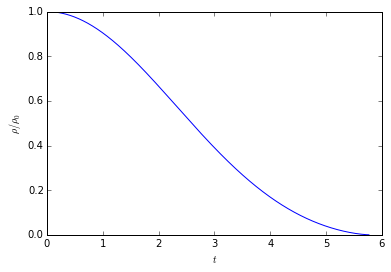

In [43]:
from scipy.integrate import odeint

def deriv(y, t): 
    # return derivatives of the array y at time t
    γ = 5/3.0
    return np.array([ y[1], 
                  - (γ-2)/y[0] * y[1]**2 - 2/t*y[1] - y[0]**(3-γ)/γ ] )

t = np.arange(0.0001, 6, 0.01)
yinit = np.array([1, 0]) # initial values
y = odeint(deriv, yinit, t)

plt.plot(t, y[:,0])
plt.xlabel(r'$t$')
plt.ylabel(r'$\rho / \rho_0$')


There are few numerical issues remaining.  At $t=0$ the DE is singular, but the initial condition removes this singularity. We solve the problem by integrating from t =0.001 as the starting point.

As t approaches 6 we get another numerical issue. Perhaps changing the solver (or its settings) could improve this. Under the hood, the solver is lsode from ODEPACK. 